In [0]:
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [0]:
!git clone https://github.com/DevashishX/AbstractClustering.git; 

Cloning into 'AbstractClustering'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 616 (delta 32), reused 42 (delta 9), pack-reused 548
Receiving objects: 100% (616/616), 669.95 MiB | 29.04 MiB/s, done.
Resolving deltas: 100% (286/286), done.
Checking out files: 100% (367/367), done.


In [0]:
!cp -r AbstractClustering/* ./.
!ls -alFh

total 140M
drwxr-xr-x  1 root root 4.0K Apr 16 21:39  ./
drwxr-xr-x  1 root root 4.0K Apr 16 21:37  ../
drwxr-xr-x 15 root root 4.0K Apr 16 21:39  AbstractClustering/
-rw-r--r--  1 root root  55K Apr 16 21:39  BaseTemplate.ipynb
-rw-r--r--  1 root root  39M Apr 16 21:39  cleaned.7z
-rw-r--r--  1 root root  26K Apr 16 21:39  ClusterKEuclid.ipynb
-rw-r--r--  1 root root  60K Apr 16 21:39  ColabTemplate.ipynb
drwxr-xr-x  1 root root 4.0K Apr 15 16:10  .config/
-rw-r--r--  1 root root 3.7K Apr 16 21:39  convert_repository_json.py
drwxr-xr-x  2 root root 4.0K Apr 16 21:39  CORE_files/
-rw-r--r--  1 root root  33K Apr 16 21:39  CORE.html
-rw-r--r--  1 root root  54K Apr 16 21:39  CreateSentenceEmbedding.ipynb
drwxr-xr-x  2 root root 4.0K Apr 16 21:39  dataset/
-rw-r--r--  1 root root  93K Apr 16 21:39  Devashish_word2vec_cluster.ipynb
-rw-r--r--  1 root root 3.9M Apr 16 21:39  downloaded_sample_500.pkl
-rw-r--r--  1 root root  27K Apr 16 21:39  example_tags.txt
drwxr-xr-x  3 root root 4.0K A

In [0]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

 AbstractClustering		     OptimalK
 BaseTemplate.ipynb		     output
 cleaned.7z			     papers.7z
 ClusterKEuclid.ipynb		     papersqlite.py
 ColabTemplate.ipynb		     PickleViewer.ipynb
 convert_repository_json.py	     PklCleaned
 CORE_files			     PklCleaned.7z
 CORE.html			     plot_dbscan.ipynb
 CreateSentenceEmbedding.ipynb	     plots
 dataset			     preprocessing.py
 Devashish_word2vec_cluster.ipynb    README.md
 downloaded_sample_500.pkl	     sample_data
 drive				     sample.html
 example_tags.txt		     scripts.sh
'final app'			     sentence_embedding.py
 FindKTemplateClusterKEuclid.ipynb   splitembs.ipynb
 h_cluster.ipynb		     TemplateClusterKEuclid.ipynb
 __init__.py			     templates
 Keras-DEC.ipynb		     test.txt
 LICENSE			     Untitled.ipynb
 MegaDfs			     word2vec_cluster.ipynb
 MegaSentEmbs			     word2vectest.ipynb
 modelMetaData			     word_embedding.py
 models


In [0]:
cd AbstractClustering/

/content/AbstractClustering


# ***Set parameters***

In [0]:
__algo__ = "KMEANS"               #Name of the Clustering algorithm
__emb__ = "ftt"                 #Name of the Word Embeddings used (glove, w2v, ftt), MUST set directory below
__sentemb__ = "pmeans5"           #Name of Sentence Embedding algorithm used
recnum = 3000                     #Number of records to be read from files
k = 50                            #Number of Clusters
usesqrt = False                   #Set value of k to sqrt of recnum, overrides k
randomsample = False              #Random Sampling to be True/False for records which are read
embedDir = "../MegaSentEmbs/MegaSentEmbs/"     #Directory where embeddings are saved for that selected embedding
modelDir = "../models/"           #Directory where models are saved
megadfDir = "../MegaDfs/"         #Directory Where Megadf is to be saved
plotDir = "../plots/"             #Directory where plots are saved
metadataDir = "../modelMetaData/" #Directory where performance and distribution params are to be stored
dumpDir = "../dump/"              #Directory where test outcomes are saved

# Actual Code

### imports and time

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import os, subprocess, sys
import datetime, time
import pickle

### File Settings

In [0]:
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  123


### Number of Records
It is Recommended to Set this at the top parameters

In [0]:
recnum = recnum

### Read all the pandas dataframes

In [0]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)

randomsample:  False
megadf.shape:  (3000, 3)
CPU times: user 63.7 ms, sys: 44.8 ms, total: 109 ms
Wall time: 181 ms


In [0]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(3000, 1500)


### Number of Clusters
It is Recommended to Set this at the top parameters

In [0]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  50


## Clustering
Please modify the functions here to change algorithm

In [0]:
%%time
print("Starting Clustering Process")
start_time = time.time()
model = cluster.KMeans(n_clusters=k, n_init = 20, max_iter=1000, verbose=1, n_jobs=-1)
model.fit(data)
end_time = time.time()
timetrain = round(end_time-start_time, 2)
print("done! {}".format(timetrain))
print("k_means.fit(data) Done!")

Starting Clustering Process
done! 84.2
k_means.fit(data) Done!
CPU times: user 123 ms, sys: 46.5 ms, total: 169 ms
Wall time: 1min 24s


### Saving the output data into vars

In [0]:
centroids = model.cluster_centers_
labels = model.labels_
megadf["clusterlabel"]=labels
centroidDF = pd.DataFrame(centroids)


## Plotting

Text(0.5, 1.0, 'KMEANS with k=50 records=3000 features=1500 using ftt')

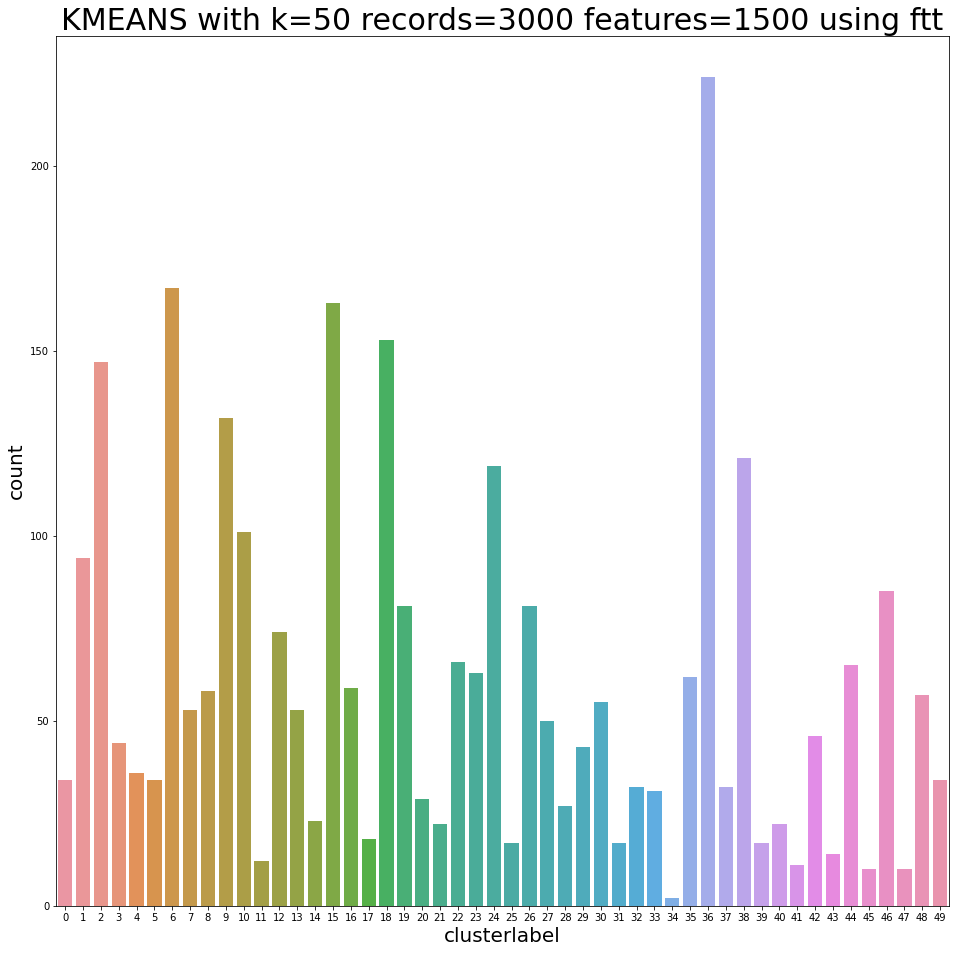

In [0]:
plt.figure(figsize=(16,16))
titlestring = "{} with k={} records={} features={} using {}".format(__algo__, k, data.shape[0], data.shape[1], __emb__)
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 30}
    )

### *Name given to saved files*

In [0]:
features = data.shape[1]
records = data.shape[0]
name = "{}_{}_{}_K{}_R{}_F{}".format(__algo__, __emb__, __sentemb__, k, records, features)
name

'KMEANS_ftt_pmeans5_K50_R3000_F1500'

### Saving Data

Save model

In [0]:
modelname = "{}_model.pkl".format(name)
pickle.dump(model, open(modelDir + modelname, 'wb'))

Save Plot

In [0]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

Save Megadf

In [0]:
clusterdfname = "{}_clustered_megadf.pkl".format(name)
megadf.to_pickle(megadfDir + clusterdfname)

Save Centroids

In [0]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_centroids.pkl".format(name)
centroidDF.to_pickle(megadfDir + centroidDFname)
print(centroidDF.shape)

(50, 1500)


#### Open dataframe to test

In [0]:
sub = megadf.loc[:, ["id", "title", "abstract", "clusterlabel"]]
sub.tail()

KeyError: ignored

In [0]:
megadf.columns

Index(['id', 'title', 'embedding', 'clusterlabel'], dtype='object')

# Performance Testing and Distribution


In [0]:
metadata = pd.DataFrame(columns=["Name", "Algo", "WordEmb", "SentEmb", "K", "R", "F", "SS", "CSavg", "CSmin", "CSmax", "T2Pavg", "T2LM", "T2LMP", "MEM"])

In [0]:
metadict = {
    "Name":None,                     #Name of the save file prefix
    "Algo":None,                     #Name of the Clustering algorithm
    "WordEmb":None,                  #Name of the Word Embeddings used (glove, w2v, ftt)
    "SentEmb":None,                  #Name of Sentence Embedding algorithm used 
    "K":None, "R":None, "F":None,    #Number of clusters, records and fetures
    "T2T":None,                      #Time required to train model
    "SS":None,                       #Silhoutte Score
    "DBS":None,                      #Davis Bouldin Score
    "CSavg":None,                    #Average Cluster Size
    "CSmin":None,                    #Minimum Cluster Size
    "CSmax":None,                    #Maximum Cluster Size
    "T2Pavg":None,                   #Average Time To Predict cluster of one record
    "T2LM":None,                     #Average Time to Load Model
    "T2LMP":None,                    #Amortized time to Predict after loading the model
    "MEM":None                      #Memory used by the Model
    }
metadict

{'Algo': None,
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': None,
 'K': None,
 'MEM': None,
 'Name': None,
 'R': None,
 'SS': None,
 'SentEmb': None,
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': None}

In [0]:
metadict["Name"]=name
metadict["Algo"]=__algo__
metadict["WordEmb"]=__emb__
metadict["SentEmb"]=__sentemb__
metadict["K"]=k
metadict["R"]=recnum
metadict["F"]=features
metadict

{'Algo': 'KMEANS',
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': 1500,
 'K': 50,
 'MEM': None,
 'Name': 'KMEANS_ftt_pmeans5_K50_R3000_F1500',
 'R': 3000,
 'SS': None,
 'SentEmb': 'pmeans5',
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': 'ftt'}

#### Time to train

In [0]:
metadict["T2T"]=timetrain

#### Scores

In [0]:
ss = silhouette_score(data, labels, metric = 'euclidean')
dbs = davies_bouldin_score(data, labels)
metadict["SS"]=ss
metadict["DBS"]=dbs

#### Cluster Size

In [0]:
clusterdata = megadf.groupby("clusterlabel", as_index=True).size().reset_index(name="count")
clusterdata.head()

,clusterlabel,count
0,0,34
1,1,94
2,2,147
3,3,44
4,4,36


In [0]:
clusterdfname = "{}_clustered_counts.pkl".format(name)
clusterdata.to_pickle(megadfDir + clusterdfname)

In [0]:
countdata = clusterdata.groupby("count").size().reset_index(name="clusters")
display(countdata.head(3))
display(countdata.tail(3))

,count,clusters
0,2,1
1,10,2
2,11,1


,count,clusters
38,163,1
39,167,1
40,224,1


In [0]:
metadict["CSmax"] = max(clusterdata["count"])
metadict["CSmin"] = min(clusterdata["count"])
metadict["CSavg"] = np.mean(clusterdata["count"])

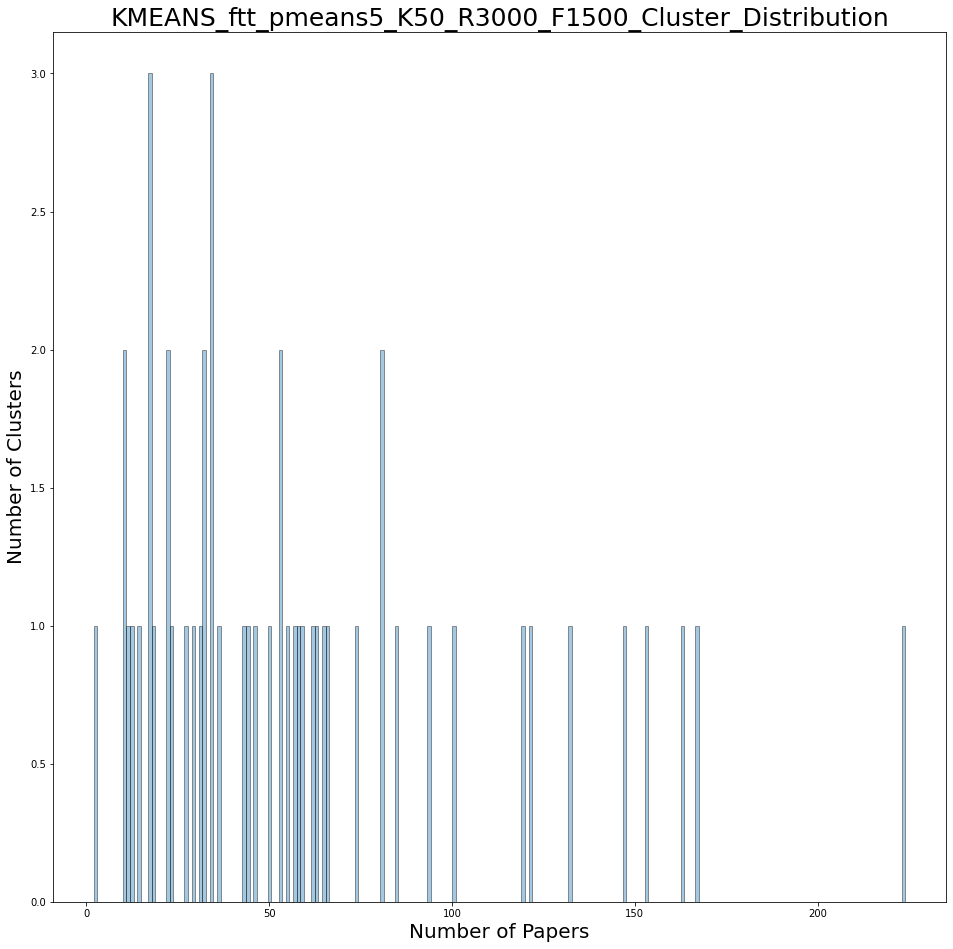

In [0]:
%matplotlib inline
plt.figure(figsize=(16,16))

sns.axes_style("whitegrid", {"axes.grid":True, 
                            'axes.spines.left': False,
                             'axes.spines.bottom': False,
                             'axes.spines.right': False,
                             'axes.spines.top': False})


titlestring = "{}_Cluster_Distribution".format(name)
snsplot = sns.distplot(clusterdata["count"], kde=False, bins=max(clusterdata["count"]),
                      hist_kws={'edgecolor':'black'},)
snsplot.set(xlabel="Number of Papers", ylabel="Number of Clusters")
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 25}
    )
plt.show()



In [0]:
snspltname = "{}_Cluster_Distribution.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

#### Prediction Time Performance

In [0]:
testdf = pd.DataFrame()
if recnum < 2000:
    samplenum = int(recnum / 10)
else:
    samplenum = 2000

for f in smalllist:
    tempdf = pd.read_pickle(f)
    testdf = megadf.append(tempdf, ignore_index = True, sort = False)
testdf = testdf.sample(samplenum, random_state=int(time.time()%100000))
predata = testdf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(2000, 1500)


In [0]:
print("Starting Predicting Performance")
testmodel = model
start_time = time.time()
for d in data:
    lb = testmodel.predict(d)
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/data.shape[0]
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2Pavg"]=avgtime

Starting Predicting Performance
Avgtime: 0.0008576412200927735 Totaltime: 1.7152824401855469


In [0]:
print("Starting Loading Performance")
loadruns = 50
start_time = time.time()
for i in range(loadruns):
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/loadruns
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LM"] = avgtime
avgtime

Starting Loading Performance
Avgtime: 0.00042183876037597655 Totaltime: 0.021091938018798828


0.00042183876037597655

In [0]:
print("Starting Amortized Performance")
loadruns = 5
avglist = []

for i in range(loadruns):
    start_time = time.time()
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
    for d in data:
        lb = testmodel.predict(d)
    end_time = time.time()
    timetest = (end_time-start_time)/data.shape[0]
    avglist.append(timetest)

timetest = np.sum(avglist)
avgtime = np.mean(avglist)
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LMP"] = avgtime
avgtime

Starting Amortized Performance
Avgtime: 0.000848156762123108 Totaltime: 0.00424078381061554


0.000848156762123108

In [0]:
modelsize = sys.getsizeof(pickle.dumps(model))
print("modelsize:", modelsize, "bytes")
metadict["MEM"]=modelsize

modelsize: 612748 bytes


In [0]:
metadict

{'Algo': 'KMEANS',
 'CSavg': 60.0,
 'CSmax': 224,
 'CSmin': 2,
 'DBS': 3.3654746556364064,
 'F': 1500,
 'K': 50,
 'MEM': 612748,
 'Name': 'KMEANS_ftt_pmeans5_K50_R3000_F1500',
 'R': 3000,
 'SS': 0.03317412220258162,
 'SentEmb': 'pmeans5',
 'T2LM': 0.00042183876037597655,
 'T2LMP': 0.000848156762123108,
 'T2Pavg': 0.0008576412200927735,
 'T2T': 84.2,
 'WordEmb': 'ftt'}

In [0]:
metadata = metadata.append(metadict, ignore_index=True)
metadata

,Name,Algo,WordEmb,SentEmb,K,R,F,SS,CSavg,CSmin,CSmax,T2Pavg,T2LM,T2LMP,MEM,DBS,T2T
0,KMEANS_ftt_pmeans5_K50_R3000_F1500,KMEANS,ftt,pmeans5,50,3000,1500,0.033174,60.0,2,224,0.000858,0.000422,0.000848,612748,3.365475,84.2


In [0]:
metadataname = "{}_metadata.pkl".format(name)
metadata.to_pickle(metadataDir + metadataname)

In [0]:
!cd ..

In [0]:
!find / -type f -name "*_metadata.pkl"

/content/AbstractClustering/modelMetaData/Agg_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/AbstractClustering/modelMetaData/KMEANS_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/AbstractClustering/modelMetaData/MBKMEANS_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/modelMetaData/Agg_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/modelMetaData/KMEANS_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/modelMetaData/MBKMEANS_glove_pmeans5_K50_R3000_F250_metadata.pkl
/content/modelMetaData/KMEANS_ftt_pmeans5_K50_R3000_F1500_metadata.pkl


In [0]:
%cd ..

/content/AbstractClustering


In [0]:
!cp /content/modelMetaData/KMEANS_ftt_pmeans5_K50_R3000_F1500_metadata.pkl /content/drive/My\ Drive/.